## The United States has faced a significant challenge regarding the relationship between food consumption and health issues.
* food causing health issues in USA 
* Rise in Chronic Diseases:increase in case of diabetes, heart diseaseand, and certain types of cancer. 
* These conditions are closely linked to poor dietary choices, such as excessive consumption of sugary beverages, fast food, and processed snacks.
* Increasing Obesity Rates:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns

In [2]:
df = pd.read_csv('data/PLACES__Local_Data_for_Better_Health__County_Data_2022_release.csv')

In [3]:
df.head(3)

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,States,Counties
0,2020,WY,Wyoming,Teton,BRFSS,Health Status,Physical health not good for >=14 days among a...,%,Crude prevalence,7.3,...,8.2,23497,56039,HLTHSTAT,PHLTH,CrdPrv,Physical Health,POINT (-110.426087 44.048662),14.0,3126.0
1,2020,WY,Wyoming,Goshen,BRFSS,Health Status,Fair or poor self-rated health status among ad...,%,Crude prevalence,13.8,...,15.8,13235,56015,HLTHSTAT,GHLTH,CrdPrv,General Health,POINT (-104.3535403 42.0894553),14.0,890.0
2,2020,WY,Wyoming,Laramie,BRFSS,Prevention,"Fecal occult blood test, sigmoidoscopy, or col...",%,Age-adjusted prevalence,61.6,...,64.6,100595,56021,PREVENT,COLON_SCREEN,AgeAdjPrv,Colorectal Cancer Screening,POINT (-104.660395 41.2928302),14.0,3119.0


In [4]:
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'States', 'Counties'],
      dtype='object')

In [5]:
df.describe()

,Year,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,States,Counties
count,188456.000000,188456.000000,0.0,0.0,188456.000000,188456.000000,1.884560e+05,188456.000000,187264.000000,187796.000000
mean,2019.867513,31.896487,NaN,NaN,29.873414,33.948199,2.100483e+05,30364.077663,26.591998,1592.431170
std,0.339021,25.146364,NaN,NaN,24.605952,25.746179,5.920674e+06,15178.245358,13.245072,920.086786
min,2019.000000,1.700000,NaN,NaN,1.500000,1.900000,8.700000e+01,59.000000,1.000000,1.000000
25%,2020.000000,11.300000,NaN,NaN,9.900000,12.800000,1.086700e+04,18173.000000,17.000000,786.000000
50%,2020.000000,23.600000,NaN,NaN,21.700000,25.700000,2.558100e+04,29171.000000,29.000000,1598.000000
75%,2020.000000,44.100000,NaN,NaN,39.300000,50.800000,6.822400e+04,45081.000000,37.000000,2383.000000
max,2020.000000,93.200000,NaN,NaN,92.600000,93.700000,3.314493e+08,56045.000000,51.000000,3221.000000


### Cleaning the data

In [6]:
df.dropna()
df.head(3)

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,States,Counties
0,2020,WY,Wyoming,Teton,BRFSS,Health Status,Physical health not good for >=14 days among a...,%,Crude prevalence,7.3,...,8.2,23497,56039,HLTHSTAT,PHLTH,CrdPrv,Physical Health,POINT (-110.426087 44.048662),14.0,3126.0
1,2020,WY,Wyoming,Goshen,BRFSS,Health Status,Fair or poor self-rated health status among ad...,%,Crude prevalence,13.8,...,15.8,13235,56015,HLTHSTAT,GHLTH,CrdPrv,General Health,POINT (-104.3535403 42.0894553),14.0,890.0
2,2020,WY,Wyoming,Laramie,BRFSS,Prevention,"Fecal occult blood test, sigmoidoscopy, or col...",%,Age-adjusted prevalence,61.6,...,64.6,100595,56021,PREVENT,COLON_SCREEN,AgeAdjPrv,Colorectal Cancer Screening,POINT (-104.660395 41.2928302),14.0,3119.0


In [ ]:
df.drop_duplicates()

### Machine Learing Model : Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [7]:
HealthColumns = [
              'StateAbbr', 'Category','Data_Value','Short_Question_Text','Measure',
              ]
Health_df = df[HealthColumns]
type(Health_df)

pandas.core.frame.DataFrame

In [8]:
Health_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188456 entries, 0 to 188455
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   StateAbbr            188456 non-null  object 
 1   Category             188456 non-null  object 
 2   Data_Value           188456 non-null  float64
 3   TotalPopulation      188456 non-null  int64  
 4   Short_Question_Text  188456 non-null  object 
 5   Measure              188456 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.6+ MB


In [74]:
Health_df.head(7)

,StateAbbr,Category,Data_Value,TotalPopulation,Short_Question_Text,Measure
0,WY,Health Status,7.3,23497,Physical Health,Physical health not good for >=14 days among a...
1,WY,Health Status,13.8,13235,General Health,Fair or poor self-rated health status among ad...
2,WY,Prevention,61.6,100595,Colorectal Cancer Screening,"Fecal occult blood test, sigmoidoscopy, or col..."
3,WY,Prevention,71.0,29331,Annual Checkup,Visits to doctor for routine checkup within th...
4,WY,Health Outcomes,5.9,20253,COPD,Chronic obstructive pulmonary disease among ad...
5,WY,Health Outcomes,9.8,38950,Current Asthma,Current asthma among adults aged >=18 years
6,WY,Health Outcomes,13.1,46676,All Teeth Lost,All teeth lost among adults aged >=65 years


In [75]:
selected_values = ['Stroke','Diabetes','Coronary Heart Disease','Obesity']

In [76]:
filteredDF = Health_df[Health_df['Short_Question_Text'].isin(selected_values)]
filteredDF

,StateAbbr,Category,Data_Value,TotalPopulation,Short_Question_Text,Measure
9,WY,Health Outcomes,2.9,4425,Stroke,Stroke among adults aged >=18 years
14,WY,Health Outcomes,28.6,39317,Obesity,Obesity among adults aged >=18 years
17,WY,Health Outcomes,9.0,29331,Diabetes,Diagnosed diabetes among adults aged >=18 years
30,WY,Health Outcomes,5.8,20215,Coronary Heart Disease,Coronary heart disease among adults aged >=18 ...
31,WY,Health Outcomes,9.1,20215,Diabetes,Diagnosed diabetes among adults aged >=18 years
...,...,...,...,...,...,...
188406,AL,Health Outcomes,13.5,44397,Diabetes,Diagnosed diabetes among adults aged >=18 years
188410,AL,Health Outcomes,37.0,55411,Obesity,Obesity among adults aged >=18 years
188424,AL,Health Outcomes,32.7,57879,Obesity,Obesity among adults aged >=18 years
188448,AL,Health Outcomes,45.2,17895,Obesity,Obesity among adults aged >=18 years


In [78]:
X =filteredDF.drop(['Measure','Data_Value'], axis=1)
y= filteredDF['Data_Value']

In [79]:
temp = pd.get_dummies(X['StateAbbr'], drop_first=True)
temp2 = pd.get_dummies(X['Category'], drop_first=True)
temp3 = pd.get_dummies(X['Short_Question_Text'], drop_first=True)



In [80]:
X= pd.concat([X, temp, temp2, temp3], axis=1)
X = X.drop(columns=['StateAbbr', 'Category','Short_Question_Text'], axis=1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18864, 55), (6288, 55), (18864,), (6288,))

In [83]:
model = LinearRegression()

In [84]:
model.fit(X_train, y_train)

LinearRegression()

In [86]:
r2 = model.score(X_test, y_test)
r2

0.9658359358999492

In [91]:
Predict = model.predict(X_test)
len(Predict)

6288

Text(0.5, 1.0, 'Major Health Problems Prediction')

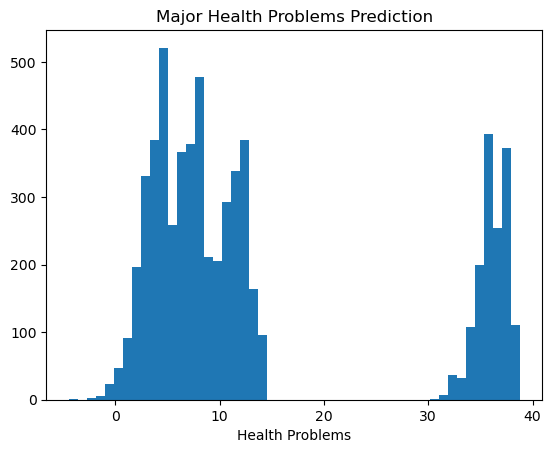

In [92]:

plt.hist(Predict, bins=50)
plt.xlabel("Health Problems")
plt.title("Major Health Problems Prediction")

In [64]:
filteredDF = filteredDF.groupby('Short_Question_Text')['Data_Value'].mean().sort_values
filteredDF

<bound method Series.sort_values of Short_Question_Text
Coronary Heart Disease     7.271231
Diabetes                  11.604914
Obesity                   36.086164
Stroke                     3.491619
Name: Data_Value, dtype: float64>

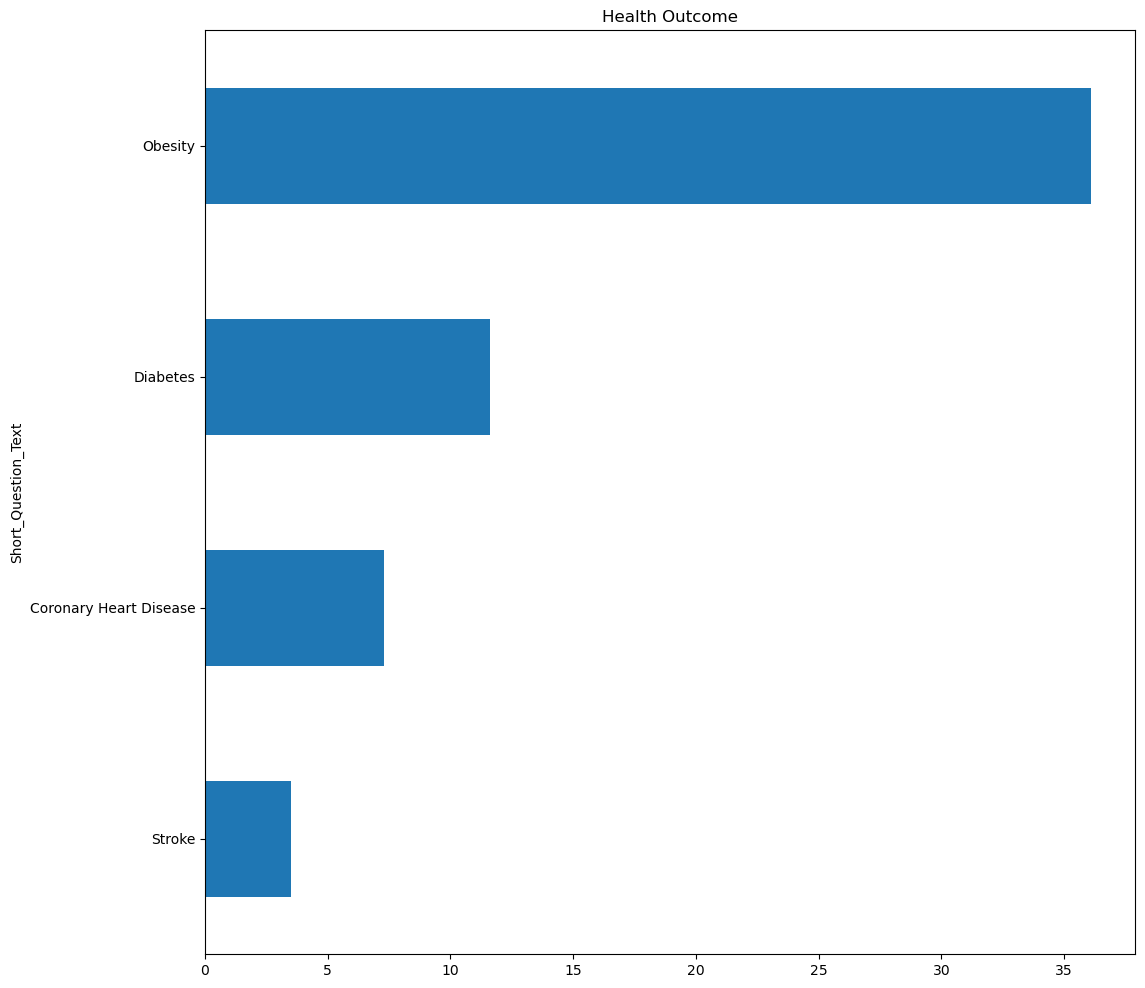

In [49]:
filtered_result = filteredDF()  # Call the method and store the result

plt.figure(figsize=(12, 12))
filtered_result.plot(kind='barh')

plt.title("Health Outcome")
plt.show()

## 4 Major Health Issues in USA from 2004 to 2017

In [67]:
DF2 = pd.read_csv('data/4healthissues.csv')

In [68]:
DF2.head(3)

,StateAbbr,2004+cardiovascular,2004+stroke,2004+obesity,2004+diabetes,2005+cardiovascular,2005+stroke,2005+obesity,2005+diabetes,2006+cardiovascular,...,2015+obesity,2015+diabetes,2016+cardiovascular,2016+stroke,2016+obesity,2016+diabetes,2017+cardiovascular,2017+stroke,2017+obesity,2017+diabetes
0,ME,6,17,29,38,16,38,14,23,23,...,48,73,38,70,49,81,37,83,47,80
1,NY,6,13,27,32,15,35,15,19,18,...,46,63,41,47,49,77,34,53,52,78
2,NY,3,16,31,37,8,44,24,18,19,...,67,75,33,66,70,74,24,71,61,72


In [13]:
# column_names = health_df.columns.tolist()
# new_column_names = {col:col.replace('+', '_') for col in column_names}
# health_df = health_df.rename(columns=new_column_names)

In [69]:
column_names = DF2.columns.tolist()
new_column_names = {col: col.replace('+', '_') for col in column_names if col != 'StateAbbr'}
DF2 = DF2.rename(columns=new_column_names)


In [70]:
DF2.describe()

,2004_cardiovascular,2004_stroke,2004_obesity,2004_diabetes,2005_cardiovascular,2005_stroke,2005_obesity,2005_diabetes,2006_cardiovascular,2006_stroke,...,2015_obesity,2015_diabetes,2016_cardiovascular,2016_stroke,2016_obesity,2016_diabetes,2017_cardiovascular,2017_stroke,2017_obesity,2017_diabetes
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,7.433333,17.642857,34.261905,38.042857,18.671429,44.619048,21.519048,23.238095,21.557143,24.519048,...,57.828571,71.957143,45.728571,63.561905,51.761905,77.823810,35.923810,70.838095,51.761905,77.309524
std,7.909647,8.135284,16.136765,10.017357,14.289275,11.669189,10.511881,7.094743,11.451962,8.205035,...,15.754369,9.505127,14.273730,10.137735,14.244632,8.494434,12.521136,10.800606,13.846751,8.935409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,14.000000,26.000000,33.000000,12.000000,39.000000,16.000000,20.000000,16.000000,21.000000,...,51.000000,68.000000,38.000000,58.000000,46.000000,74.000000,29.000000,64.000000,45.250000,73.000000
50%,6.000000,16.000000,32.000000,37.000000,15.000000,44.000000,20.000000,22.000000,20.000000,23.000000,...,58.000000,72.000000,44.000000,63.000000,51.000000,78.000000,34.000000,71.000000,51.000000,78.000000
75%,9.000000,18.000000,41.000000,42.000000,20.000000,48.000000,26.000000,25.000000,24.750000,26.000000,...,65.000000,76.000000,52.000000,69.000000,58.000000,81.750000,41.000000,77.000000,58.000000,81.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [16]:
# health_df['StateAbbr'].value_counts()

In [17]:
# selected_State = ['CA','TX','NY']
# filtered_df = health_df[health_df['StateAbbr'].isin(selected_State)]

In [18]:
health_df_transposed = health_df.set_index('StateAbbr').T

In [19]:
health_df_transposed.head(10)

StateAbbr,ME,NY,NY,GA,PA,MI,NH,GA,PA,IN,...,OR,OR,CA,CA,NV,CA,CA,CA,CA,WA
2004_cardiovascular,6,6,3,14,7,6,6,11,10,4,...,4,12,5,4,4,5,4,7,4,6
2004_stroke,17,13,16,14,16,16,15,17,17,14,...,18,18,15,12,16,13,17,13,22,17
2004_obesity,29,27,31,29,30,27,27,45,35,25,...,29,46,22,26,17,38,29,33,41,30
2004_diabetes,38,32,37,31,37,34,37,26,43,36,...,36,45,29,32,30,27,35,34,24,46
2005_cardiovascular,16,15,8,25,17,14,16,11,17,13,...,14,17,12,12,10,10,13,17,10,16
2005_stroke,38,35,44,48,39,43,41,50,49,43,...,42,37,35,45,35,31,45,35,45,47
2005_obesity,14,15,24,23,18,18,15,18,20,25,...,18,19,15,17,10,15,19,24,38,24
2005_diabetes,23,19,18,22,23,20,22,25,26,20,...,20,18,20,20,18,15,23,21,19,19
2006_cardiovascular,23,18,19,24,24,21,20,23,23,17,...,14,18,16,20,15,13,16,15,10,18
2006_stroke,26,18,26,23,23,23,23,31,25,26,...,24,24,19,22,20,24,24,20,28,23


c:\Users\jinhe\OneDrive\Documents\Dev10\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


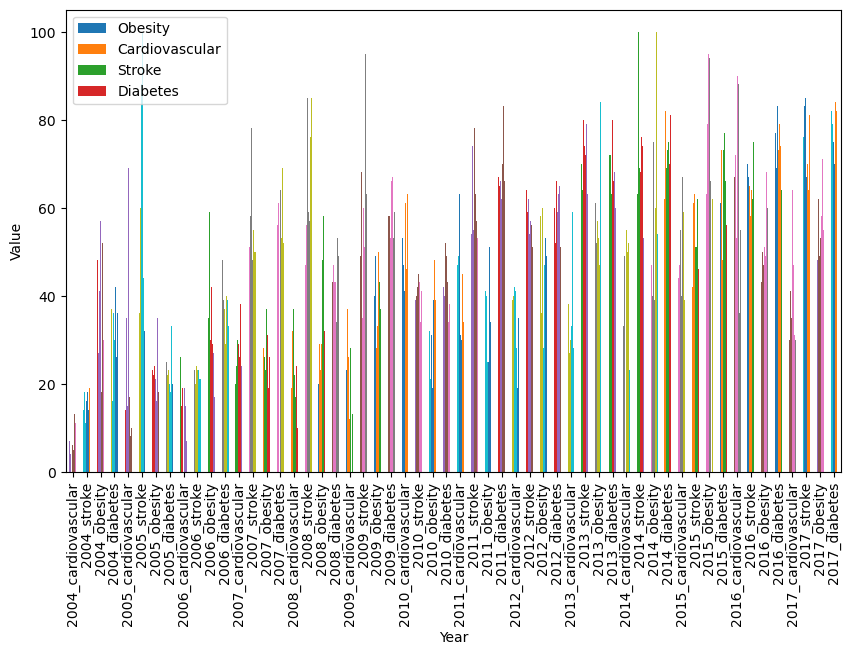

In [20]:
# Plot the transposed DataFrame
ax = health_df_transposed.plot(kind='bar', figsize=(10, 6))

# Set the x-axis label and y-axis label
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Add a legend
ax.legend(['Obesity', 'Cardiovascular', 'Stroke', 'Diabetes'])

plt.show()






In [21]:
# fig, ax = plt.subplots(figsize=(10, 6))
# for column in df3.columns:
#     ax.plot(df3.index, df3[column], marker='o', label=column)

# ax.set_xlabel('Year')
# ax.set_ylabel('Value')
# ax.set_title('Line Graph')

# # Add a legend
# ax.legend()

# plt.show()

In [24]:
# import matplotlib.pyplot as plt

# # Scatter plot for 'Stroke'
# plt.scatter(selected_df['Data_Value'], selected_df['Short_Question_Text_Stroke'], label='Stroke', alpha=0.6)

# # Scatter plot for 'Diabetes'
# plt.scatter(selected_df['Data_Value'], selected_df['Short_Question_Text_Diabetes'], label='Diabetes', alpha=0.6)

# # Scatter plot for 'Coronary Heart Disease'
# plt.scatter(selected_df['Data_Value'], selected_df['Short_Question_Text_Coronary Heart Disease'], label='Coronary Heart Disease', alpha=0.6)

# # Scatter plot for 'Obesity'
# plt.scatter(selected_df['Data_Value'], selected_df['Short_Question_Text_Obesity'], label='Obesity', alpha=0.6)

# # Labeling and legend
# plt.xlabel("X - Values")
# plt.ylabel("Y - Health Issues")
# plt.legend()

# # Display the plot
# plt.show()


In [ ]:
selected_columns = ['Short_Question_Text_Stroke', 'Short_Question_Text_Diabetes', 'Short_Question_Text_Coronary Heart Disease', 'Short_Question_Text_Obesity']
selected_df = dummies_df[selected_columns]

In [ ]:
# Create a dictionary to map the old column names to the new column names
column_mapping = {
    'Short_Question_Text_Stroke': 'Stroke',
    'Short_Question_Text_Diabetes': 'Diabetes',
    'Short_Question_Text_Coronary Heart Disease': 'Coronary Heart Disease',
    'Short_Question_Text_Obesity': 'Obesity'
}

# Rename the columns using the dictionary
new_name_df = selected_df.rename(columns=column_mapping)

# Verify the updated column names
print(new_name_df.columns)


In [ ]:

import seaborn as sns

# Create a DataFrame with the selected columns


# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=new_name_df)
plt.xlabel('Health Issues')
plt.ylabel('Data Value')
plt.title('Violin Plot - Health Issues')
plt.show()






In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_name_df)
plt.xlabel('Health Issues')
plt.ylabel('Data Value')
plt.title('Box Plot - Health Issues')
plt.show()
